## Recap

**Linear Regression Model**

- f<sub>w,b</sub>(x)=wx+b

**Squared Error cost function**

- L(w,b)=<sup>1</sup>/<sub>2m</sub> * ∑ (f<sub>w,b</sub>(x<sup>(i)</sup>) - y<sup>(i)</sup>)<sup>2</sup>

**Gradient Descent**

repeat until conversion{  

- w = w - α * <sup>dJ(w,b)</sup>/<sub>dw</sub>
- b = b - α * <sup>dJ(w,b)</sup>/<sub>db</sub>

}

In [27]:
import math
import numpy as np
import matplotlib.pyplot as plt

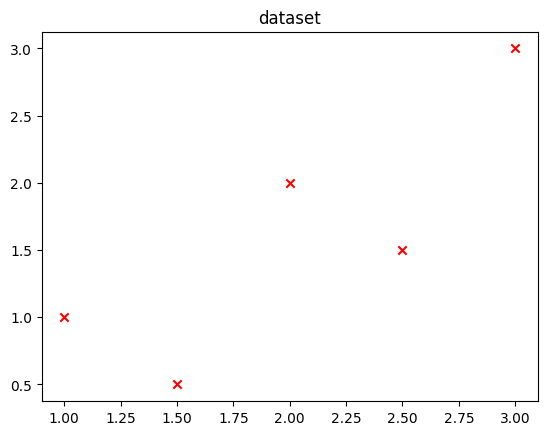

In [28]:
# Made up dataset
x_train = np.array([1.0, 1.5, 2.0, 2.5, 3.0])  # features
y_train = np.array([1.0, 0.5, 2.0, 1.5, 3.0])  # target Values

# Plot dataset
plt.scatter(x_train, y_train, c='r', marker='x')
plt.title("dataset")
plt.show()

In [29]:
# Cost function
def compute_cost(x, y, w, b):
    
    m = x.shape[0]
    total_cost = 0
    
    for i in range(m):
        y_hat = w*x[i] + b
        total_cost += (y_hat - y[i]) ** 2
        
    return 1/(2*m) * total_cost

In [30]:
# Check if compute_cost function is working properly
total_cost = compute_cost(x_train, y_train, 0, 0)
print(f'When (w,b)=(0,0), cost = {total_cost}')

When (w,b)=(0,0), cost = 1.6500000000000001


In [31]:
# Gradient function
def compute_gradient(x, y, w, b):
    
    m = x.shape[0]
    dJ_dw = 0
    dJ_db = 0
    
    for i in range(m):
        dJ_dw += (w*x[i]+b - y[i]) * x[i]
        dJ_db += w*x[i]+b - y[i]
        
    return dJ_dw / m, dJ_db / m

In [32]:
# Gradient descent function
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha

    Args:
        x (ndarray (m,)): features
        y (ndarray (m,)): target values
        w_in (scalar): initial value of w
        b_in (scalar): initial value of b
        alpha (float): learning rate
        num_iters (int): number of iterations to perform gradient descent
        cost_function: function to compute cost
        gradient_function: function to compute gradient
        
    Returns:
        w (scalar): updated value of w
        b (scalar): updated value of b
        J_history (List): History of cost values
        p_history (list): History of parameters [w,b] 
    """
    
    w, b = w_in, b_in
    J_history = []
    p_history = []
    
    for i in range(num_iters):
        # compute gradient and update w, b
        dJ_dw, dJ_db = gradient_function(x, y, w, b)

        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db
        
        # compute cost
        cost = cost_function(x, y, w, b)
        J_history.append(cost)
        p_history.append([w, b])
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dJ_dw: 0.3e}, dj_db: {dJ_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 
    

In [33]:
w_optimal, b_optimal, J_history, p_history = gradient_descent(x_train, y_train, 0, 0, 1.0e-2, 10000, compute_cost, compute_gradient)
print(f"w = {w_optimal}, b = {b_optimal}")
print(f"Your model is f = {w_optimal} * x + {b_optimal}")

Iteration    0: Cost 1.49e+00  dj_dw: -3.700e+00, dj_db: -1.600e+00   w:  3.700e-02, b: 1.60000e-02
Iteration 1000: Cost 1.24e-01  dj_dw: -1.178e-02, dj_db:  2.596e-02   w:  8.727e-01, b:-1.19537e-01
Iteration 2000: Cost 1.21e-01  dj_dw: -4.670e-03, dj_db:  1.029e-02   w:  9.495e-01, b:-2.88795e-01
Iteration 3000: Cost 1.20e-01  dj_dw: -1.852e-03, dj_db:  4.081e-03   w:  9.800e-01, b:-3.55906e-01
Iteration 4000: Cost 1.20e-01  dj_dw: -7.342e-04, dj_db:  1.618e-03   w:  9.921e-01, b:-3.82517e-01
Iteration 5000: Cost 1.20e-01  dj_dw: -2.911e-04, dj_db:  6.416e-04   w:  9.969e-01, b:-3.93068e-01
Iteration 6000: Cost 1.20e-01  dj_dw: -1.154e-04, dj_db:  2.544e-04   w:  9.988e-01, b:-3.97251e-01
Iteration 7000: Cost 1.20e-01  dj_dw: -4.577e-05, dj_db:  1.009e-04   w:  9.995e-01, b:-3.98910e-01
Iteration 8000: Cost 1.20e-01  dj_dw: -1.815e-05, dj_db:  3.999e-05   w:  9.998e-01, b:-3.99568e-01
Iteration 9000: Cost 1.20e-01  dj_dw: -7.196e-06, dj_db:  1.586e-05   w:  9.999e-01, b:-3.99829e-01


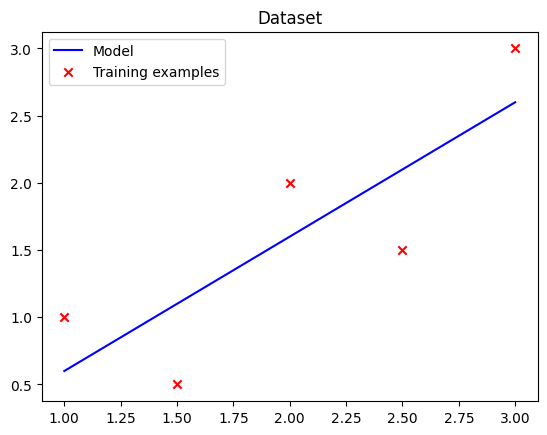

In [35]:
# Plot the model on the dataset
plt.plot([x_train[0], x_train[-1]],
         [w_optimal * x_train[0] + b_optimal, w_optimal * x_train[-1] + b_optimal],
         c='b',
         label="Model")
plt.scatter(x_train, y_train, c='r', marker='x', label="Training examples")
plt.title("Dataset")
plt.legend()
plt.show()

In [37]:
# Prediction
print(f"Prediction for x = 3: {w_optimal * 3 + b_optimal}")
print(f"Prediction for x = 4: {w_optimal * -4 + b_optimal}")
print(f"Prediction for x = 55: {w_optimal * 55 + b_optimal}")

Prediction for x = 3: 2.599975430189961
Prediction for x = 4: -4.399808566535592
Prediction for x = 55: 54.59837083443693
